### Exploratory Data Analysis

**Why?**

- Understand the `Shape` of the Data

- Learn which `Feature` might be useful

- `Inform` the Cleaning that will come next

**What?**

- Counts or `Distributions` of All Variables

- `Data Type` of Each Features

- Identify `Missing` Data

- Identify `Duplicates`

- `Correlation`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Using the `Titanic` Dataset from [Kaggle](https://www.kaggle.com/c/titanic/overview) Competition.

Feature | Data Type | Description 
:--- | :--- | :---
**Name** | (str) | Name of the Passenger
**Pclass** | (int) | Ticket Class
**Sex** | (str) | Sex of the Passenger
**Age** | (float) | Age in years
**SibSp** | (int) | Number of Siblings and Spouses aboard
**Parch** | (int) | Number of Parents and Children aboard
**Ticket** | (str) | Ticket Number
**Fare** | (float) | Passenger Fare
**Cabin** | (str) | Cabin Number
**Embarked** | (str) | Port of Embarkation ( C = Cherbourg, Q = Queens Town, S = South Ampton )

In [2]:
df = pd.read_csv('../Data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`PassengerId` is not useful in our Dataset

In [4]:
df.drop(columns=['PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring continuous features
`Drop` all `Categorical` Features

In [5]:
numeric = df.drop(columns=['Name','Sex','Ticket','Cabin','Embarked'], axis=1)
numeric.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [6]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


 Generate `Descriptive` Statistics

In [7]:
numeric.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
numeric.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [9]:
numeric.groupby(numeric['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


### Plot Continuous Features

<Figure size 432x288 with 0 Axes>

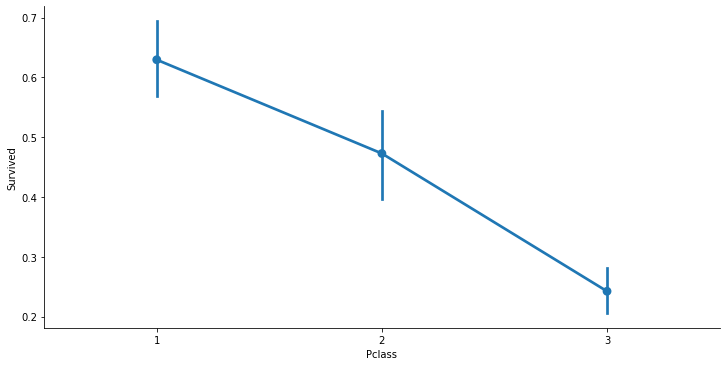

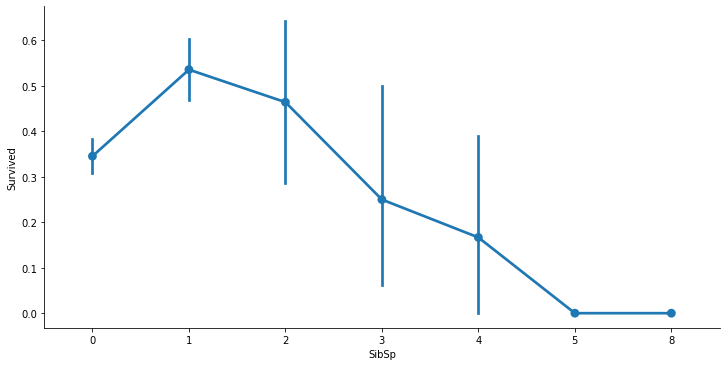

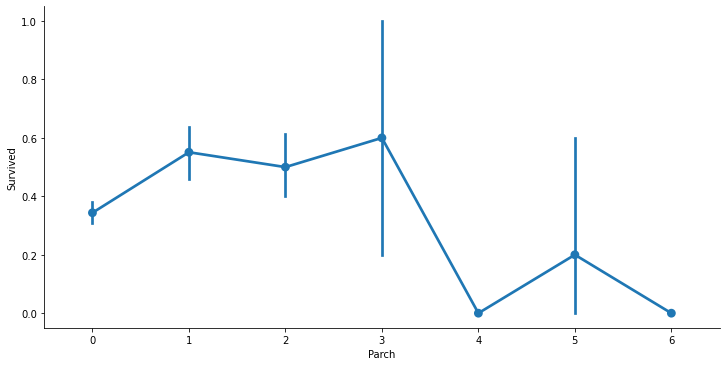

In [10]:
for i, col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=numeric, kind='point', aspect=2);

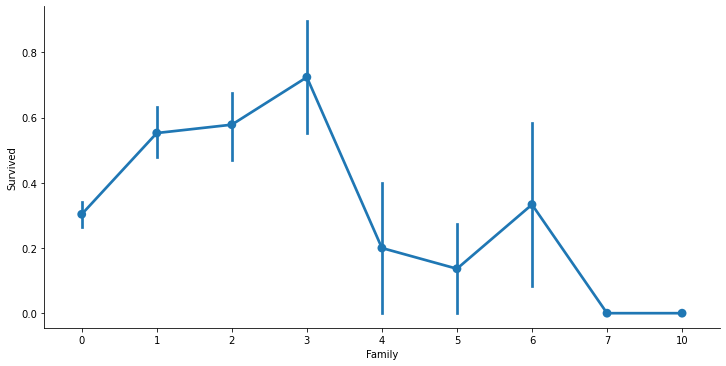

In [11]:
numeric['Family'] = numeric['SibSp'] + numeric['Parch']
sns.catplot(x = 'Family', y = 'Survived', data = numeric, kind='point', aspect=2);

### Data Cleaning

**Why?**

- Shape Data in a Way a Model can `Learn` Accurately

- Remove `Irrelevant` Data

- `Adjust` Features to be Acceptable for a Model

**What?**

- Anonymize ( Remove Personal Data from Data Set )

- `Encode` Categorical Variables

- Filling `Missing` Data

- `Scale` Data to Account `Skewed` Data `Outliers`

Fill `Missing` for Age

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [13]:
print(df.isna().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


`Family` represents Parents, Children, Siblings and Spouse.

- Remove Irrelevant Features 
- Prevent `Multicollinearity`

In [14]:
df.drop(columns=['Parch','SibSp','Name','Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,22.0,7.2500,NaN,S
1,1,1,female,38.0,71.2833,C85,C
2,1,3,female,26.0,7.9250,NaN,S
3,1,1,female,35.0,53.1000,C123,S
4,0,3,male,35.0,8.0500,NaN,S


### Explore Categorical Features

Explore `Sex`, `Embarked` and `Cabin`

In [16]:
df.groupby(df['Cabin'].isnull()).mean()

,Survived,Pclass,Age,Fare
Cabin,,,,
False,0.666667,1.196078,35.258349,76.141504
True,0.299854,2.639010,28.048341,19.157325


Passengers with Cabin had Higher Survival Rate : `67%`

Passengers without Cabin had Lower Survival Rate : `30%`

---

`Indicating` whether Passenger was having a Cabin or not

`0` : Passenger was not having Cabin

`1` : Passenger was having Cabin

In [17]:
df['Cabin'] = np.where(df['Cabin'].isnull(),0,1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,22.0,7.2500,0,S
1,1,1,female,38.0,71.2833,1,C
2,1,3,female,26.0,7.9250,0,S
3,1,1,female,35.0,53.1000,1,S
4,0,3,male,35.0,8.0500,0,S


### Plot Categorical Plot

<Figure size 432x288 with 0 Axes>

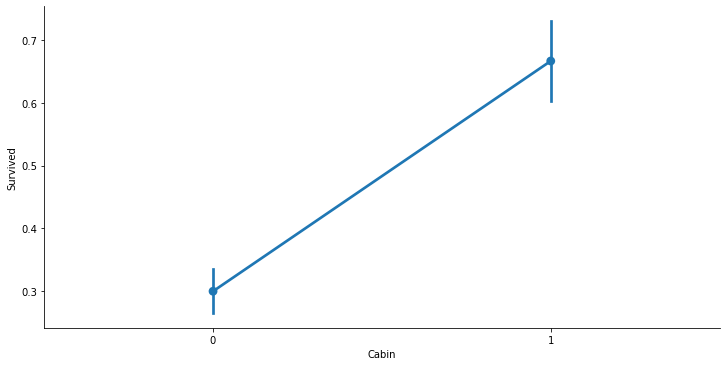

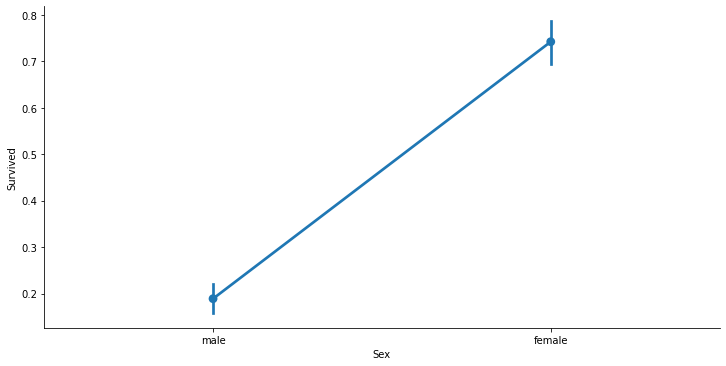

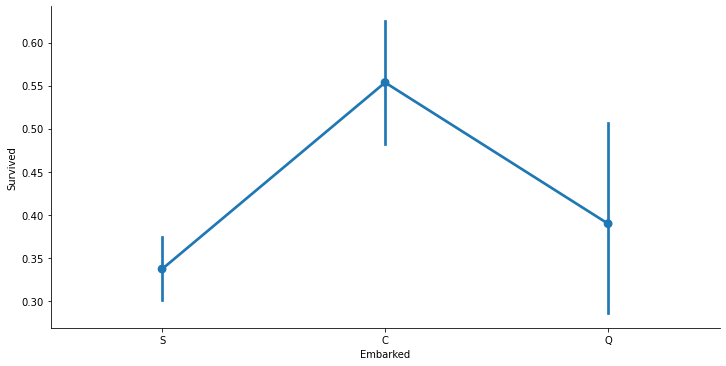

In [19]:
for i, col in enumerate(['Cabin','Sex','Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=df, kind='point', aspect=2);

In [20]:
df.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [21]:
df.pivot_table('Survived', index='Cabin', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin,,,
0,99,73,515
1,69,4,129


`Convert` Sex to Numeric

In [22]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64